
<div style="text-align: center; padding: 30px 10px;">

<h1 style="color:#ff7500; font-size: 24px; margin-bottom: 10px;">
МФТИ ФПМИ
</h1>

<h2 style="font-size: 30px; margin-top: 5px;">
Практикум Python - Основной Поток
</h2>

<hr style="width: 60%; border: 1px solid #10069f; margin: 25px auto;">

<h3 style="font-size: 36px;">
2. Словари (dict), множества (set).

Функции.
</h3>

<p style="margin-top: 20px;">
<strong>Дата:</strong> 10-12 февраля 2026 года<br>
</p>

<p style="margin-top: 25px;">
Данный ноутбук является частью серии семинаров по курсу  
<em>«Практикум Python»</em> и предназначен для учебных и образовательных целей.
</p>

</div>


# Dict и Set

### Хеш-функция

**Хеш-функция** — специальная функция, которая определённым алгоритмом преобразует входные данные произвольной длины в выходное значение фиксированной длины (битовую строку).

Для каждого сообщения алгоритм создаёт свой уникальный хеш. Если пропустить одно и то же сообщение через алгоритм, хеш на выходе будет неизменным. Но если заменить в исходных данных хотя бы одну букву, хеш изменится до неузнаваемости:


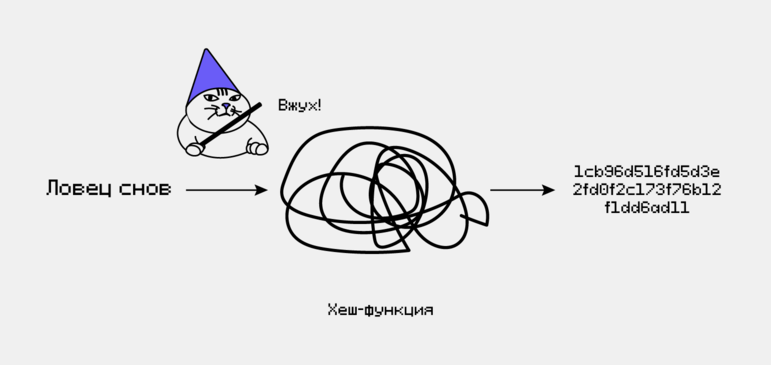

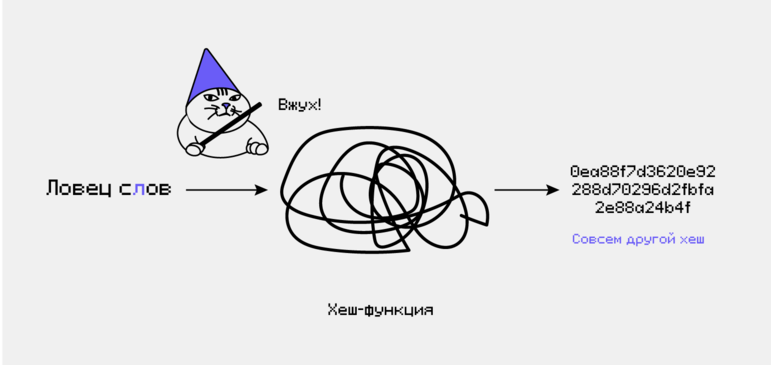

Ключевое свойство хеш-функции — **необратимость**. Нельзя просто развернуть алгоритм и прочитать исходное сообщение. Поэтому, если хакеру в руки попадёт база данных с захешированными паролями, взломать он их сможет только полным перебором — а на это может уйти несколько месяцев и даже лет.

Также важное свойство - **эффективность хранения** и скорость получения доступа к большим данным, так как поиск по хэш-коду занимает гораздо меньше времени, чем обычный линейный поиск.

In [ ]:
hash("hello")

7928697675244063736

In [ ]:
type(hash("hello"))

int

**Применение:**

- Пароли и цифровые подписи
- Проверка целостности файлов
 - Например, при запуске игры - чтобы проверить, что пользователь не накрутил чит-коды
 - Системы контроля версий (Git) — для проверки целостности объектов в репозитории: файлов, коммитов, деревьев и тд

- Блокчейн
 - Для гарантии подлинности транзакций. В каждый блок цепи добавляется хеш предыдущей операции — при изменении данных хеши не совпадут и сеть не примет изменения.




### Хешируемость в Python

**Хешируемые:**

*   str

*   int

*   bool

*   float

*   tuple

*   frozenset

*   frozendict

#### Хешируемость кортежей

**Внимание №1** - не все кортежи хешируемы! Кортеж хешируем, если все его элементы тоже хешируемы:

In [ ]:
print(hash((1, 2, (3, 4))))
print(hash((1, 2, [3, 4])))

3794340727080330424


TypeError: unhashable type: 'list'

Посмотреть хеш-значение в Python можно с помощью функции `hash`. Примеры хеш-значений для разных типов:

In [ ]:
print(hash(343))
print(hash(-343))
print(hash(True))
print(hash('hello'))
print(hash((1, 2, 3)))

343
-343
1
7928697675244063736
529344067295497451


Проверим, являются ли хешируемыми список, кортеж и словарь:

In [ ]:
print("list:", [1, 2].__hash__ is not None)
print("tuple:", (1, 2).__hash__ is not None)
print("dict:", {1: 2}.__hash__ is not None)

list: False
tuple: True
dict: False


#### Хеширование `float`

**Внимание** - нужно быть очень аккуратным с хэшированием float и лучше их вообще не хэшировать:

In [ ]:
hash1 = hash(6.5)
hash2 = hash(6.500000000000001)
hash3 = hash(6.5000000000000001)
hash4 = hash(round(6.50443,2))  # или хэшировать вот так

print("Hash 1: ", hash1)
print("Hash 2: ", hash2)
print("Hash 3: ", hash3)
print("Hash 4: ", hash4)

Hash 1:  1152921504606846982
Hash 2:  1152921504606849030
Hash 3:  1152921504606846982
Hash 4:  1152921504606846982


**Замечание** - после перезапуска интерпретатора у сложных объектов (например, строк) будет уже другое значение хеш-функции.

### Dict

#### Создание словаря

Создать словарь в Python можно либо с помощью фигурных скобок, либо с помощью функции `dict`:

In [ ]:
dict_example = {'ivan': 100, 'peter': 200, -10: 'new', (1, -10): True}

print(dict_example)
print(type(dict_example))

{'ivan': 100, 'peter': 200, -10: 'new', (1, -10): True}
<class 'dict'>


In [ ]:
dict_example = dict([
     ('ivan', 100),
     ('peter', 200),
     (-10, 'new'),
     ((1, -10), True)
])
print(dict_example)
print(type(dict_example))

{'ivan': 100, 'peter': 200, -10: 'new', (1, -10): True}
<class 'dict'>


In [ ]:
dict_example = dict(
    ivan=100,
    peter=200,
    key='new'
)
print(dict_example)
print(type(dict_example))

{'ivan': 100, 'peter': 200, 'key': 'new'}
<class 'dict'>


Самым удобным способом создать словарь из двух списков (список ключей и список значений) является использование функции `zip`:

In [ ]:
keys = ['ivan', 'peter', -10, (1, -10)]
values = [100, 200, 'new', True]

dict_example = dict(zip(keys, values))
print(dict_example)

{'ivan': 100, 'peter': 200, -10: 'new', (1, -10): True}


#### Ключи словаря

Ключом словаря может быть любой хешируемый (`hashable`) объект. Определение hashable из документации Python ([ссылка](https://docs.python.org/3/glossary.html#term-hashable)):

>Объект является хэшируемым, если у него имеется хеш-значение, которое **не меняется за все его время существования** (необходим метод `__hash__()`), и **может быть сравним с другими объектами** (необходим метод __eq__()). Хэшируемые объекты, которые являются равными, должны иметь одинаковое хеш-значение.



#### Операции со словарями

Для доступа к элементам словаря нужно передать ключ в квадратных скобках:

In [ ]:
dict_example = {'ivan': 100, 'peter': 200, -10: 'new', (1, -10): True}

print(dict_example['ivan'])

100


Изменение, добавление и удаление элементов так же происходит по ключам:

In [ ]:
dict_example = {'ivan': 100, 'peter': 200, -10: 'new', (1, -10): True}

# Изменение
dict_example['ivan'] = 200
print(dict_example)

# Добавление
dict_example['ivan_the_great'] = 300
print(dict_example)

# Удаление
del dict_example['ivan']
print(dict_example)

# Проверить вхождение
print(dict_example.get("abacaba") is None)
print('peter' in dict_example)


# Получение по несуществующему ключу
print(dict_example['ivan_the_greatest'])

{'ivan': 200, 'peter': 200, -10: 'new', (1, -10): True}
{'ivan': 200, 'peter': 200, -10: 'new', (1, -10): True, 'ivan_the_great': 300}
{'peter': 200, -10: 'new', (1, -10): True, 'ivan_the_great': 300}
True
True


KeyError: 'ivan_the_greatest'

### Set

**Set** (множество) - контейнер, позволяющий хранить набор уникальных элементов.

Аналогичен `unordered_set` из C++, но может содержать объекты разных типов.

Основные операции:
- добавить элемент в множество
- удалить элемент из множества
- проверить наличие элемента в множестве

Принцип работы также основан на хеш-таблице.

Где удобно использовать множества:
- подсчет уникальных элементов в списке
- быстрая проверка элемента на вхождение

#### Создание множества

Для создания множества используются фигурные скобки и функция `set`:

In [ ]:
set_example = {1, 2, 3}
print(set_example)
print(type(set_example))

{1, 2, 3}
<class 'set'>


In [ ]:
set_example = set([2, 3, 4])
print(set_example)
print(type(set_example))

{2, 3, 4}
<class 'set'>


In [ ]:
list(set([1,1,2,3]))

[1, 2, 3]

**Замечание** - пустое множество создается только как `set()`, в случае `{}` создастся пустой словарь.

In [ ]:
x = {}
x = set()
print(type(x))

<class 'dict'>


#### Операции с множествами

Для добавления, удаления и проверки наличия элемента в множестве существуют методы `add` и `remove` и оператор `in`:

In [ ]:
set_example = {1, '2', 3.0, 'four'}
print(set_example)

# Добавление
set_example.add(5)
print(set_example)

# Удаление
set_example.remove(1)
print(set_example)

set_example.discard(3)
print(set_example)

# Проверить вхождение
print(1 in set_example)

{1, 3.0, '2', 'four'}
{1, 3.0, 5, 'four', '2'}
{3.0, 5, 'four', '2'}
{5, 'four', '2'}
False


В чем разница remove и discard???

In [ ]:
set_example.discard(3)
print(set_example)

{5, 'four', '2'}


In [ ]:
set_example.remove(3)
print(set_example)

KeyError: 3

Поскольку множество содержит лишь **уникальные** элементы, то добавление одинаковых элементов не меняет множество:

In [ ]:
print(set_example)

set_example.add(1)
set_example.add(1)
set_example.add(1)
set_example.add(1)
set_example.add(1)

print(set_example)

{5, 'four', '2'}
{1, 5, 'four', '2'}


#### Основные методы множества

Рассмотрим основные методы множеств.

С помощью метода `update` можем объединить два множества:

In [ ]:
a = {1, 2, 3}
b = set([2, 3, 4])

b.update(a) # объединить множество с другим множеством
print(a, b)

{1, 2, 3} {1, 2, 3, 4}


Помимо проверки на вхождение элемента в множество (`in`), имеются проверки на вхождения одного множества в другое:

In [ ]:
print(a, b)
print(b.issubset(a))    # является ли b подмножеством a
print(b.issuperset(a))  # является ли b надмножеством a
print(b.isdisjoint(a))  # являются ли непересекающимися

{1, 2, 3} {1, 2, 3, 4}
False
True
False


Операции над множествами:

In [ ]:
a = {1, 2, 3, 5}
b = set([2, 3, 4, 5, 6])

print(a - b)  # все элементы a, которых нет в b
print(b - a)  # все элементы b, которых нет в a
print(a | b)  # объединение множеств
print(a & b)  # пересечение
print(a ^ b)  # все элементы, которые есть только в одном из двух множеств

{1}
{4, 6}
{1, 2, 3, 4, 5, 6}
{2, 3, 5}
{1, 4, 6}


Эти же операции можно использовать как методы объектов:

In [ ]:
print(a.difference(b))             # a - b
print(a.union(b))                  # a | b
print(a.intersection(b))           # a & b
print(a.symmetric_difference(b))   # a ^ b

a.difference_update(b)            # a -= b
a.update(b)                       # a |= b
a.intersection_update(b)          # a &= b
a.symmetric_difference_update(b)  # a ^= b

set()
{1, 2, 3, 4}
{1, 2, 3}
{4}


**Существуют хешируемые версии set и dict: frozenset и frozendict. Они создаются и больше не изменяются**

### Итерирование

Словари:

In [ ]:
for key in {"a":1, "b":2}:
  print(key)

a
b


In [ ]:
for key in {"a": 1, "b": 2}.keys():
  print(key)

a
b


In [ ]:
for value in {"a":1, "b":2}.values():
  print(value)

1
2


In [ ]:
for key, value in {"a":1, "b":2}.items():
  print(key, value)

a 1
b 2


Множества:

In [ ]:
for element in {"a", "b", "c"}:
  print(element)

b
c
a


**Замечание:**

Set не гарантирует сохранение порядка элементов внутри множества.

C Python 3.7 *dict* поддерживает порядок добавления элементов, до этого использовался специальный тип *OrderedDict*

#Comprehension

Их называют **генераторами коллекций**. Не путать с **генераторными выражениями**

## list comprehensions

Часто приходится создавать производные списки - новые списки, элементы которых вычисляются из соответствующих элементов другого контейнера. Например, список квадратов чисел:

In [ ]:
input_list = [3, 14, 15, 92, 65, 35, 89, 79, 323, 84626]

output_list = [0] * len(input_list)  # создаем список из нулей длины как input_list
for i, item in enumerate(input_list):  # "функция" enumerate позволяет получать не только элеметы, но и их порядковый номер
    output_list[i] = item ** 2

print(output_list)

[9, 196, 225, 8464, 4225, 1225, 7921, 6241, 104329, 7161559876]


In [ ]:
output_list = [item**2 for item in input_list]
print(output_list)

[9, 196, 225, 8464, 4225, 1225, 7921, 6241, 104329, 7161559876]


Рассмотрим пример использования условия (`condition`) при создании производных списков. Для этого будем сохранять в выходной список только те элементы, которые делятся на `2`:

In [ ]:
output_list = [item ** 2 for item in input_list if item % 2 == 0]
print(output_list)

`list comprehension` можно использовать в связке с тернарным оператором:

In [ ]:
result = [x if x != 7 else 7 ** 25 for x in range(10)]
print(result)

## `dict comprehension` и `set comprehension`

Можно ли так же удобно создавать не только списки, но и множества и словари?

Да, аналогично существуют `dict comprehension` и `set comprehension`:

```python
# set comprehension
{значение for var in container if условие}

# dict comprehension
{ключ : значение for var in container if условие}
{ключ : одно_значение if условие else другое_значение for var in container}
```

In [ ]:
# set comprehension
result = {x ** 2 for x in range(10)}
print('set comprehension:', type(result), result)

# dict comprehension
result = {x: x ** 2 for x in range(10)}
print('dict comprehension:', type(result), result)

set comprehension: <class 'set'> {0, 1, 64, 4, 36, 9, 16, 49, 81, 25}
dict comprehension: <class 'dict'> {0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}


**Замечание** В тернарных операторах НЕТ elif, но можно делать вложенные условия (создания Сатаны). Выглядят они примерно так:

In [ ]:
<r_1> if <c_1> else <r_2> if <c_2> else <r_3> if <c_3> else <r_4>

# Функции

## Базовый синтаксис

Объявление функции в Python выглядит следующим образом:

```python
def function_name(args):
    do_something()
    return something_else
```

In [ ]:
def function():
    pass

**Ключевое слово "pass" бывает полезно, если нужно явно указать, что в блоке кода ничего делать не нужно**

 **Примечание 1.** В Python функция всегда *возвращает* значение. В теле функции может отсутствовать `return`, тогда она вернёт специальное значение `None`

**Примечание 2.** В Python нет строгой типизации и, соответственно, проверок входных аргументов на корректность типа и операции, которые можно совершать с этими аргументами. Будьте внимательны и следите за тем, что передаёте в функцию!

Создадим простейшую функцию, которая будет возвращать частное двух ее аргументов:

In [ ]:
# аналогичная функция, возвращающая "ничего"
def print_division(a, b):
    print("Result:", a / b)

result = print_division(4, 2)
print(result, type(result))

Result: 2.0
None <class 'NoneType'>


**Замечание:**  Функции в Python могут возвращать и несколько значений. В таком случае эти значения неявно оборачиваются в кортеж и возвращаются тоже кортежем:

In [ ]:
def divide_and_return_args(a, b):
    return a / b, a, b

In [ ]:
result = divide_and_return_args(4, 2)
result1, result2, result3 = divide_and_return_args(4, 2)
print('Кортеж, вернувшийся из функции:', result)
print('Распакованный кортеж:', result1, result2, result3)

Кортеж, вернувшийся из функции: (2.0, 4, 2)
Распакованный кортеж: 2.0 4 2


##  Изменяемые и неизменяемые аргументы

Правило передачи аргументов в функцию:

>- Изменяемые аргументы передаются по ссылке
>- Неизменяемые аргументы передаются по значению

Рассмотрим пример. Функция принимает 2 аргумента - словарь `team` (изменяемый аргумент) и целое число `number` (неизменяемый аргумент). Функция изменяет оба аргумента внутри себя:

In [ ]:
def get_my_hero_team(team, number):
    number = 10
    team['Chuck'] = 'Norris'
    team['Sylvester'] = 'Stallone'

Посмотрим, что произойдет с нашими переменными снаружи функции. Поменяются ли они при вызове функции?

In [ ]:
number = 5
hero_team = {'Bruce': 'Willis', 'Chuck': 'Lorre'}
get_my_hero_team(hero_team, number)

Переменная `number` не изменила свое значение:

In [ ]:
number

5

Переменная `hero_team` значение поменяла:

In [ ]:
hero_team

{'Bruce': 'Willis', 'Chuck': 'Norris', 'Sylvester': 'Stallone'}

Почему так произошло? Потому что числа (`int`, `float`), строки, кортежи, булевы значения (`True`, `False`), байты в Python не изменяются. Каждый раз, как-либо изменяя значения таких объектов, Python на самом деле производит копирование. Так же и при передаче в функцию: для неизменяемых (`immutable`) типов создаётся копия, и с копией производятся все операции внутри функции.


## Позиционные и именованные аргументы

Аргументы в функцию можно передавать двумя способами:

- по позиции - просто перечисляем значения аргументов, в таком случае первый указанный при вызове функции аргумент будет соотнесен с первым указанным при объявлении функции аргументов:

In [ ]:
def simple_division(a : int, b: int):
    print(f"Function received {a=}, {b=}")
    return a / b

In [ ]:
simple_division(4, 2)  # при вызове функции в переменную a запишется 10, в b - 19

Function received a=4, b=2


2.0

- по ключу - необходимо явно указать, какому аргументу мы хотим присвоить значение:

In [ ]:
simple_division(b=2, a=4)  # необязательно перечислять аргументы в том же порядке

Function received a=4, b=2


2.0

**PEP 8:** При указании аргументов по имени пробелы вокруг знака равенства не ставятся!

Можно смешивать способы указания аргументов, например, `a` указать с помощью позиции, а `b` - с помощью ключа:

In [ ]:
simple_division(4, b=2)

Function received a=4, b=2


2.0

**Но** нужно помнить правило - сначала аргументы по позиции, затем по ключам:

In [ ]:
simple_division(b=2, 4)

SyntaxError: positional argument follows keyword argument (<ipython-input-61-1501e34f4723>, line 1)

In [ ]:
simple_division(2, a=4)

TypeError: simple_division() got multiple values for argument 'a'

In [ ]:
simple_division(a=4)

TypeError: simple_division() missing 1 required positional argument: 'b'

В Python всё является объектом: и привычные переменные, и функции, и модули... Поэтому, если не вызвать функцию явно (ничего ей не передать), она будет распознана как отдельный объект ("переменная") со своим адресом в памяти и уникальным именем:

In [ ]:
simple_division

## Аргументы по умолчанию

Для аргумента можно задать значение по умолчанию. Тогда, если при вызове функции не было передано значение, оно будет установлено по умолчанию:

In [ ]:
def safe_division(a, b, check_zero=True):
    """
    This function returns division of two arguments and checks whether the divisor is equal to zero
    """
    if check_zero and b == 0:
        print('Caught division by zero!')
        return None
    else:
        return a / b

**Замечание:** Как и во многих языках, в питоне функция может содержать более одного "return"

In [ ]:
safe_division(4, 0)

Caught division by zero!


In [ ]:
safe_division(4, 0, check_zero=False)

ZeroDivisionError: division by zero

## Starred expressions

Функции в Python могут принимать при вызове не только фиксированное, но и переменное число элементов.

Для этого используются **операторы распаковки** (`starred expressions`) `*` и `**`, которые распаковывают список / кортеж / множество и словарь соответственно. Продемонстрируем это на примере:

In [ ]:
print(1,2,4,3,3,3)

1 2 4 3 3 3


In [ ]:
test_list = ['1', 1, False, [3], -5+1j]

print(test_list)

print(*test_list)
print(test_list[0], test_list[1], test_list[2], test_list[3], test_list[4])

['1', 1, False, [3], (-5+1j)]
1 1 False [3] (-5+1j)
1 1 False [3] (-5+1j)


Т.е. оператор распаковки `*` преобразует контейнер в набор позиционных аргументов.

Оператор распаковки `**` действует аналогично для словаря, но преобразует его в набор ключевых аргументов.

In [ ]:
test_dict = {"sep": "\n", 'end': 'END OF PRINT'}
# передаём в качестве разделителя "\n", в качестве завершающей строки "END OF PRINT"
print("Hello, world!", "This is my first program!", **test_dict)

print()
print()

print("Hello, world!", "This is my first program!", sep="\n", end='END OF PRINT')

Hello, world!
This is my first program!END OF PRINT

Hello, world!
This is my first program!END OF PRINT

Оператор распаковки также применяют, когда количество возвращаемых значений неизвестно или переменно:

In [ ]:
test_list = [1, 1, 2, 3, 5, 8, 13]

first_value, second_value, *other_values = test_list
print(first_value, second_value, other_values)

1 1 [2, 3, 5, 8, 13]


В `result_other` может попасть и 0 переменных:

In [ ]:
shorter_list = test_list[:1]

first_value, *other_values = shorter_list
print(first_value, other_values)

1 []


Однако, остальные переменные обязательно должны быть заполнены:

In [ ]:
test_list_shortest = test_list[:1]

first_value, second_value, *other_values = test_list
print(first_value, second_value, other_values)

1 1 [2, 3, 5, 8, 13]


Аналогично, если забыть добавить звёздочку, Python посчитает, что присвоить нужно конкретные значения, а не переменный список, и в случае вышше будет ожидать три конкретных значения. При получении больше трёх значений для присваивания выбросится ошибка. Как говорится, проще показать, чем объяснить:

In [ ]:
first_value, second_value, other_values = test_list
print(first_value, second_value, other_values)

**Лайфхак**

Для того чтобы отбросить лишние возвращаемые значения, можно использовать общепризнанный символ `_`. По сути, это объявит переменную, называющуюся "_", и можно будет к ней обратиться дальше в коде, но обычно этот символ используют, чтобы закинуть туда что-нибудь ненужное:

In [ ]:
first_value, *_ = test_list
print(first_value, _)

1 [1, 2, 3, 5, 8, 13]


In [ ]:
def safe_division(a, b, check_zero=True):
    """
    This function returns division of two arguments and checks whether the divisor is equal to zero
    """
    if check_zero and b == 0:
        print('Caught division by zero!')
        return None
    else:
        return a / b, 5, 4, 3, 2

In [ ]:
a, b, *_ = safe_division(1, 2)

## Переменное число аргументов

Операторы распаковки можно использовать и при объявлении функции, чтобы она могла принимать произвольное количество аргументов. В общем случае объявление функции выглядит так:

```python
def foo(
    positional or keyword args, # аргументы, которые могут передаваться как именованно, так и позиционно
    *[other positional args], # обычно обозначается *args или просто *, переменный список позиционных аргументов. Представляет собой кортеж
    keyword-only args, # именованные аргументы, которые нельзя передавать позиционно
    **[other keyword args] # обычно обозначается **kwargs или просто **, переменный список именованных аргументов. Представляет собой словарь
)
```

Разумеется, можно использовать любое подмножество этих типов аргументов, не обязательно указывать их все.

Мы можем задать функцию с переменным числом позиционных аргументов. Например, это можно использовать для того, чтобы собрать вместе несколько списков (функция `chain` в пакете `itertools` делает то же самое):

In [ ]:
def merge_lists(*lists):
    print("Input elements:", lists)
    main_list = []
    for lst in lists:
        main_list.extend(lst)
    return main_list

print(merge_lists([1], ['a', 'b']))
print(merge_lists([1], ['a', 'b'], [True, False]))
print(merge_lists())

Input elements: ([1], ['a', 'b'])
[1, 'a', 'b']
Input elements: ([1], ['a', 'b'], [True, False])
[1, 'a', 'b', True, False]
Input elements: ()
[]


Аналогично и для оператора `**` и ключевых аргументов:

In [ ]:
def print_keyword_args(**kwargs):
    print("Input kwargs:", kwargs)
    print("Answer:", kwargs.get("answer", "Not Found"))

print_keyword_args(a="1", b=[2], answer=42)

Input kwargs: {'a': '1', 'b': [2], 'answer': 42}
Answer: 42


Таким образом, можем объявить функцию, которая принимает любое количество любых аргументов:

In [ ]:
def uberfunc(*args, **kwargs):
    print('args =', args, 'kwargs =', kwargs)

uberfunc()
uberfunc(1, 2, 3, a=4)
uberfunc(answer=42)

args = () kwargs = {}
args = (1, 2, 3) kwargs = {'a': 4}
args = () kwargs = {'answer': 42}


**Примечание**

Обычно позиционность используется для того, чтобы передать наиболее важные аргументы в функцию, а именованные аргументы - для изменения каких-то несущественных деталей поведения функции.

**Примечание для смешариков**

Часто конструкция `(*args, **kwargs)` применяется при наследовании классов, чтобы инициализировать родительский класс какими-то параметрами, которые дочерний класс может не использовать. Например:

```python
class Son(Parent):

    def __init__(self, specific_argument, *args, **kwargs):
        super().__init__(*args, **kwargs) # инициадизируем родителя и отдаём ему все "лишние" аргументы
        do_something(specific_argument)
```

Тот же принцип используется и внутри функций некоторых библиотек, чтобы передавать "низлежащим" функциям аргументы на обработку.

[Звездочки в питоне - как они используются](https://tproger.ru/translations/asterisks-in-python-what-they-are-and-how-to-use-them/)

## Анонимные функции

**Анонимная функция** - особый вид функций, которые объявляются в месте использования и не получают уникального идентификатора (имени) для доступа к ним. В Python они реализованы как **лямбда-функции**. Лямбда-функция может принимать любое количество аргументов, но имеет только одно выражение (одну строку), которое и возвращает при вызове.

Основной синтаксис лямбда-функции выглядит следующим образом:

```python
lambda x: command()
```

Создадим анонимную функцию и запишем ее в переменную:

In [ ]:
f_lambda = lambda x: print(x, end='EOL')

Проверим, что мы действительно создали функцию:

In [ ]:
type(f_lambda)

function

Проверим как работает наша лямбда-функция:

In [ ]:
f_lambda("Hello!")

Hello!EOL

Записав нашу лямбда-функцию в переменную мы ей как бы дали имя, на практике так не делают - всегда лучше явно объявить функцию через `def ...`, если планируется использовать её больше одного раза.

Созданная нами функция полностью эквивалентна следующей обычной (именованной) функции:

In [ ]:
def f(x):
    return print(x, end='EOL')

f("Hello!")

Hello!EOL

Как и обычная функция, лямбда-функция может принимать на вход несколько аргументов и иметь значения по умолчанию:

In [ ]:
print((lambda x, y=4: x + y)(10, 13000))
print((lambda x, y=4: x + y)(10))
print((lambda x, y=4, *args: x + y + sum(args))(10, 13000, 4, 100))

13010
14
13114


### Применения лямбда-функций

**Зачем нужны лямбда-функции?** Некоторые функции принимают в качестве аргумента не обычную переменную, например, числовую или строку, а другую функцию. Эта переданная функция-аргумент используется для каких-либо вычислений внутри и обычно является достаточно простой.

Ярким примером такой функции является функция `sorted`. Она используется для сортировки контейнеров по возрастанию и по умолчанию для этого она сравнивает элементы контейнера между собой.

In [ ]:
test_list = [3, 14, 15, 2, 73]

sorted(test_list)

Иногда в качестве элементов нашего сортируемого контейнера используются другие контейнеры, например, кортежи и списки. Часто в таких случаях мы хотим выполнить не стандартную лексикографическую сортировку, а, например, сортировку по какому-либо конкретному индексу контейнера-элемента.

Разберем это на примере. Пусть имеем список `customer_data`, который содержит пары элементов (кортеж из двух элементов) "имя клиента", "полученный доход".

In [ ]:
customer_data = [("ivan", 2), ("george", 4), ("carl", 1), ("liz", 20), ("vlad", 10)]

Попробуем отсортировать этот список стандартным способом:

In [ ]:
sorted(customer_data)

[('carl', 1), ('george', 4), ('ivan', 2), ('liz', 20), ('vlad', 10)]

Сортировка выполнилась в первую очередь по первому полю (как и полагается лексикографически). Но нам бы хотелось отсортировать список по доходу с клиентов.

Здесь нам поможет один из необязательных аргументов функции `sorted` - `key`. Он принимает на вход функцию (не путать со значением/результатом функции), которая принимает один аргумент - элемент списка, и возвращает одно значение, по которому и будет выполняться сортировка.

В таких случаях, когда функция используется лишь один раз для небольшой работы, и применяют лямбда-функции. Выполним сортировку с использованием аргумента `key`:

In [ ]:
sorted(customer_data, key=lambda x: x[1])  # сортируем по элементу с индексом 1

[('carl', 1), ('ivan', 2), ('george', 4), ('vlad', 10), ('liz', 20)]

Как видим, получили сортировку по элементу с индексом 1, но хотелось бы иметь сортировку по убыванию. Здесь нам может помочь другой аргумент - `reverse`, который позволяет выполнить сортировку по убыванию (в обратном порядке).

Еще одним примером встроенной функции, которая в качестве аргументов принимает другую функцию, является функция `map`.

Функция `map` позволяет применить одну функцию ко всем элементам контейнера. Функция `map` возвращает результат в специальном служебном типе данных, поэтому преобразуем его в список.

In [ ]:
list(map(lambda x: x ** 2, [1, 2, 3]))

[1, 4, 9]

Один из частых сценариев применения функции `map` - считывание набора чисел, вводимых из строки.

Предположим, мы считали строку в переменную `input_str`:

In [ ]:
input_str = "123 456 123778 8898"

Затем можем разбить строку эту строку на отдельные элементы по пробелу:

In [ ]:
input_str_list = input_str.split(' ')
input_str_list

['123', '456', '123778', '8898']

Остается лишь преобразовать элементы из строкового типа в целочисленный:

In [ ]:
list(map(int, input_str_list))

[123, 456, 123778, 8898]

Где еще применяются лямбда-функции:
- встроенные функции `min()`, `max()`
- функции `nlargest()` и `nsmallest()` из модуля `heapq`
- функция `filter` - фильтрование элементов списка, применяем к элементам функцию, если вернула `True`, то оставляем
- многие библиотеки


 ## Документирование и аннотирование функций

In [ ]:
import typing as tp

def relative_difference(x: float, y: float) -> float | None:
    """
    Compares two quantities taking into account their absolute values
    And another line just to make an example of multiline docstrings
    """
    delta = x - y
    mean = (x + y) / 2
    if mean == 0.0:
        return None
    return abs(delta / mean)

**PEP 8:** Для аргументов с типом при указании дефолтного значения принято ставить пробелы вокруг знака равенства

**Важно:** Хороший паттерн - указывать тип принимаемых аргументов и возвращаемого значения

In [ ]:
help(relative_difference)

Help on function relative_difference in module __main__:

relative_difference(x: float, y: float) -> float | None
    Compares two quantities taking into account their absolute values
    And another line just to make an example of multiline docstrings



# Практика

Поскольку мы уже умные смешарики, будем писать всё, что не вмещается в одну строчку, в виде **функций**

## Задача 0

### Задача 0.1

Используя тернарный оператор, напишите программу, которая принимает на вход значение x и проверяет, правда ли, что x меньше 5

In [ ]:
x = 10101

In [ ]:
# TODO

False


### Задача 0.2

Создайте:

1. Список, заполненный квадратами натуральных чисел от 5 до 10
2. Словарь, где ключи - это символы от 65 до 70, а элементы - это соответсвующие им символы `chr(x)`
3. Множество, заполненное квадратами натуральных чисел от 5 до 10, если число кратно 2

In [ ]:
# TODO

# TODO

# TODO

{36, 64, 100}

### Задача 0.3

Создайте словарь, где ключами будут числа от 0 до 20 включительно, а значения -
1. -1, если значение ключа делится на 5
2. 1 иначе


❗ Используйте comprehensions

In [ ]:
my_dict = # TODO

## Задача 1

In [ ]:
import random
elements = random.choices(list(range(1000)), k=1500)

Замените элементы списка по формуле $x = (x^2) \  mod \  15$

In [ ]:
# TODO

### Задача 1.1 Ох уж эти корейцы

Вам дан список с возрастами людей в одной неизвестной корейской фирме. Вышел новый закон, который постановляет, что теперь возраст сотрудников считается не традиционным способом, а по факту рождения. Менеджер компании попросил вас перезаполнить базу данных, обновив возраст сотрудников по правилу:

$age = (age + 1)$

 Используйте функцию `map`

In [ ]:
ages = random.choices(list(range(20, 65)), k=100500)

In [ ]:
ages[:5]

[30, 56, 37, 50, 47]

In [ ]:
new_age = # TODO

In [ ]:
list(new_age)[:5]

[31, 57, 38, 51, 48]

### Задача 1.2 Ох уж эти корейцы v2.0

Условие такое же, но теперь вам предстоит решить такую же задачу с использованием `list comprehensions`

In [ ]:
new_age = # TODO

### Задача 1.3 Ох уж эти китайцы

Как мы знаем, в Китае очень жесткая конкуренция в школах. А еще очень много народу.

Вы учитель в среднестатистической школе, и у вас в классе 100 человек, которые написали контрольную работу. За каждую работу они получили оценку от 0 до 100, и вам предстоит вывесить рейтинг класса.

Отсортируйте оценки по убыванию рейтинга.

❌ Разворачивать список **нельзя**

Hint: используйте sort с каким-то параметром сортировки

In [ ]:
ratings = random.choices(list(range(101)), k=100)

In [ ]:
# TODO

## Задача 2


In [ ]:
# Примеры строк
s1 = "Hello"
s2 = "World"
s3 = "12345"
s4 = "  Python  "
s5 = "Level"

# 1. Базовые операции со строками
# Конкатенация (сложение строк)
concat = s1 + " " + s2  # "Hello World"

# Повторение строки
repeat = s1 * 3  # "HelloHelloHello"

# Доступ по индексу
first_char = s1[0]  # "H"
last_char = s1[-1]  # "o"

# Срезы
substring = s1[1:4]  # "ell"
reverse = s1[::-1]  # "olleH"

# 2. Проверочные методы
# Проверка, состоит ли строка только из букв
is_alpha = s1.isalpha()  # True

# Проверка, состоит ли строка только из цифр
is_digit = s3.isdigit()  # True

# Проверка, состоит ли строка только из букв и цифр
is_alnum = s1.isalnum()  # True

# Проверка, состоит ли строка только из пробелов
is_space = "   ".isspace()  # True

# Проверка начала и конца строки
starts_with = s1.startswith("He")  # True
ends_with = s1.endswith("lo")  # True

# 3. Изменение регистра
upper_case = s1.upper()  # "HELLO"
lower_case = s1.lower()  # "hello"
capitalize = s1.capitalize()  # "Hello"
title_case = "hello world".title()  # "Hello World"
swap_case = s1.swapcase()  # "hELLO"

# 4. Работа с пробелами
# Удаление пробелов с обеих сторон
strip = s4.strip()  # "Python"

# Удаление пробелов только слева
lstrip = s4.lstrip()  # "Python  "

# Удаление пробелов только справа
rstrip = s4.rstrip()  # "  Python"

# Выравнивание строки
centered = s1.center(10)  # "  Hello   "
left_just = s1.ljust(10)  # "Hello     "
right_just = s1.rjust(10)  # "     Hello"

# 5. Поиск и замена
find_index = s1.find("l")  # 2 # Найти подстроку - вернет индекс
count_occurrences = s1.count("l")  # 2 - вернет количество

# Замена подстроки
replaced = s1.replace("l", "L")  # "HeLLo"

# Разделение строки
partitioned = s1.partition("l")  # ('He', 'l', 'lo')

# 6. Разделение и объединение строк
# Разбить строку по пробелам
split = "Hello World Python".split()  # ['Hello', 'World', 'Python']

# Объединение списка строк в одну
joined = ", ".join(["apple", "banana", "cherry"])  # "apple, banana, cherry"

# Разделение строки по строкам (учитывает переносы)
split_lines = "Line1\nLine2\nLine3".splitlines()  # ['Line1', 'Line2', 'Line3']

# 7. Форматирование строк
# Форматирование через format
formatted = "Hello, {}!".format("Alice")  # "Hello, Alice!"

# Форматирование через f-строки
name = "Alice"
f_string = f"Hello, {name}!"  # "Hello, Alice!"

# Дополнение строки нулями
zfilled = "42".zfill(5)  # "00042"

# 8. Работа с символами ASCII
# Получение кода символа
char_code = ord('A')  # 65

# Получение символа по коду
char_from_code = chr(65)  # "A"

### Задача 2.1 Какая-то задача на работу со строками

Напишите функцию` get_string_info`, принимающую на вход строку, которая выполняет следующие действия:

1. Находит самое длинное слово в строке
2. Выводит количество слов в строке
3. Переворачивает каждое слово в строке задом наперёд

Возвращает полученные строки через запятую

In [ ]:
def get_string_info(string: str):
  # 1
  max_word = max(string.split(), key=len)

  # 2
  num_w = len(string.split())

  # 3
  rev = " ".join(list(map(lambda x: x[::-1], string.split())))

  return max_word, num_w, rev

In [ ]:
get_string_info("Hello world")

('Hello', 2, 'olleH dlrow')

### Задача 2.2 Какая-то задача на работу со строками v2.0 - смешарики


Напишите функцию` get_extended_string_info`, принимающую на вход строку, которая выполняет следующие действия:

1. Находит самое длинное слово в строке
2. Выводит количество слов в строке
3. Переворачивает каждое слово в строке задом наперёд


4. Удаляет все цифры из строки
5. Заменяет все буквы верхнего регистра на нижний, а нижнего регистра на верхний
6. Проверяет, является ли строка палиндромом (без учета пробелов, регистра и пунктуации, те только буквы и цифры)
7. Если строка не является палиндромом, то выводит первые 5 символов строки в обратном порядке

Возвращает полученные строки через запятую

In [ ]:
help(filter)

Help on class filter in module builtins:

class filter(object)
 |  filter(function or None, iterable) --> filter object
 |  
 |  Return an iterator yielding those items of iterable for which function(item)
 |  is true. If function is None, return the items that are true.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs)
 |      Create and return a new object.  See help(type) for accurate signature.



In [ ]:
"".join(filter(lambda string: not string.isdigit(), "Hello World"))

'Hello Worldfkjf'

In [ ]:
def get_string_info(string: str):
  # 1
  max_word = max(string.split(), key=len)

  # 2
  num_w = len(string.split())

  # 3
  rev = " ".join(list(map(lambda x: x[::-1], string.split())))

  return max_word, num_w, rev, 5, 4, 5, 6

## Задача 3

### Задача 3.1 Снова китайцы??

 У нас есть два набора данных: один — это набор студентов, которые сдали экзамен по математике, а второй — это набор студентов, которые сдали экзамен по физике. Условия неотчисления - надо сдать хоть один экзамен. Условие на получение стипендии - надо сдать оба.
 Напишите функцию, которая выводит, кто получит стипендию, а кто НЕ отчислен

In [ ]:
first = {"A", "B", "C"}
second = {"A", "D", "E"}

first & second

{'A'}

### Задача 3.2 Турки

Из администрации школы вам поступили списки турецких студентов, сдававших экзамены по математике и физике в виде словаря "имя": tuple(оценка по физике, оценка по математике)

Если оценка ниже трех - студент не сдал, если ниже четырех - не получает стипендию. Если хотябы один предмет не сдан, то это отчисление

1. С помощью comprehensions сформируйте списки студентов, кто сдал экзамены на проход/стипу. Подумайте, какие категории вам нужны

2. Сформируйте списки на стипендию и на отчисление

In [ ]:
exam_scores = {
    "Serkan Bolat": (3, 4),
    "Burak Deniz": (5, 3),
    "Ahmet Yildirim": (2, 5),
    "Merve Kaya": (4, 4),
    "Emre Demir": (2, 2),
    "Zeynep Arslan": (3, 3),
    "Mustafa Yilmaz": (5, 4),
    "Elif Ozdemir": (4, 3),
    "Canan Karaca": (2, 4),
    "Yusuf Sahin": (5, 5),
    "Selin Cengiz": (3, 2),
    "Kerem Gunes": (4, 5),
    "Duru Aydin": (3, 4),
    "Omer Yilmaz": (2, 3),
    "Esra Uysal": (4, 4),
    "Halil Yalcin": (3, 3),
    "Ayse Yildirim": (5, 4),
    "Fatma Demir": (2, 2),
    "Ali Gokce": (4, 3),
    "Cemre Erdem": (3, 5)
}


In [ ]:
# TODO

## Задача 4 Starred Expressions

### Задача 4.1 Без ЛОРа

Напишите функцию, принимающую на вход студента и его оценки, а потом печатающую его оценки

In [ ]:
def printStudentInfo(student, *grades):
  print(student, *grades)

In [ ]:
printStudentInfo(
    "Мария", 95, 97, 94
)

Мария 95 97 94


### Задача 4.2 Без ЛОРа

`def f(first, second, <any num of args>, *args, **kwargs)`

Напишите функцию, принимающую на вход студента, его оценки по m предметам за n семемтров в виде списков и доп характеристики (id, названия предметов) , а потом всё это выводящую на экран с форматированием вида:


`Студент: Мария

Оценки по семестрам:

  Семестр 1: 95, 97, 94

  Семестр 2: 89, 92, 91

  Семестр 3: 85, 88

Дополнительная информация:

  Id: 67890

  Subjects: Математика, Физика, Химия`

In [ ]:
def printStudentInfo(student, *grades, **kwargs):
  # TODO

In [ ]:
printStudentInfo(
    "Мария", [95, 97, 94], [89, 92, 91], [85, 88, 15],
     id="67890", subjects=["Математика", "Физика", "Химия"]
)

[95, 97, 94] [89, 92, 91] [85, 88, 15]
('id', '67890')
('subjects', ['Математика', 'Физика', 'Химия'])


### Задача 4.3 Я у мамы разработчик - смешарики

Вспомните задачу 2.2 и переиспользуйте ее, чтобы получить количество слов в строке. Ненужные переменные запихните в `_` и `*_`

In [ ]:
# TODO